## Objective

You work for Spark Funds, an asset management company. Spark Funds wants to make investments in a few companies. The CEO of Spark Funds wants to understand the global trends in investments so that she can take the investment decisions effectively.

## Business and Data Understanding

The firm has 2 constraints for investment:

- It wants to invest between 5 and 15 million USD per round of investment

- It wants to invest only in English-speaking countries because of the ease of communication with the companies it would invest in. (Consider a country to be English speaking only if it is one of the official languages)

## Business Objective

The objective is to identify the best sectors, countries, and a suitable investment type for making investments. The overall strategy is to invest where others are investing, implying that the 'best' sectors and countries are the ones 'where most investors are investing'.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
#Loading both files into pandas dataframe
companies = pd.read_csv('data/companies.txt', sep='\t', encoding = 'ISO-8859-1')
rounds2=pd.read_csv('data/rounds2.csv',encoding='ISO-8859-1')

In [4]:
#Companies.txt

companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


<b>Companies.txt</b> - Company details like name, homepage_url, category_list, status, country, founded_at etc.

In [5]:
#Rounds2.csv

rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,"10,000,000.00"
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,"700,000.00"
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,"3,406,878.00"
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,"2,000,000.00"


<b>rounds2.csv</b> - Funding details for all companies like funding round type, funded at, amount raised etc.

We convert the permalink and company_permalink of companies.txt and round2.csv to lowercase for matching

In [6]:
#Converting permalink and company_permalink of companies and rounds2 respectively to lowercase
companies['permalink'] = pd.Series(map(lambda x: x.lower() , companies['permalink']))
rounds2['company_permalink']= pd.Series(map(lambda x: x.lower(), rounds2['company_permalink']))

In [7]:
#computing unique records in companies table
print("Unique values in permalink (Companies.txt): {}".format(companies['permalink'].nunique()))

Unique values in permalink (Companies.txt): 66368


In [8]:
#computing unique records in rounds2 table
print("Unique values in company_permalink (round2.csv): {}".format(rounds2['company_permalink'].nunique()))

Unique values in company_permalink (round2.csv): 66370


Renaming <b>company_permalink</b> to <b>permalink</b> to enable merging of round2.csv and companies.txt

In [9]:
#Joining two tables with identical column and values
rounds2= rounds2.rename(columns = {"company_permalink": "permalink"})

master_frame=pd.merge(rounds2,companies,on='permalink',how='inner')
master_frame.head()

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,"10,000,000.00",#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,"700,000.00",:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,"3,406,878.00","(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,"2,000,000.00",0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [10]:
#Total records 
print('Dataframe has {} records and {} features'.format(master_frame.shape[0],master_frame.shape[1]))

Dataframe has 114942 records and 15 features


#### Missing values

Count of missing values

In [11]:
# Count of missing data
master_frame.isnull().sum()

permalink                      0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83803
funded_at                      0
raised_amount_usd          19984
name                           1
homepage_url                6132
category_list               3407
status                         0
country_code                8671
state_code                 10939
region                     10160
city                       10157
founded_at                 20520
dtype: int64

Percentage of missing data

In [27]:
# Percentage of missing data
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

permalink                  0.00
funding_round_permalink    0.00
funding_round_type         0.00
funding_round_code        72.91
funded_at                  0.00
raised_amount_usd         17.39
name                       0.00
homepage_url               5.33
category_list              2.96
status                     0.00
country_code               7.54
state_code                 9.52
region                     8.84
city                       8.84
founded_at                17.85
dtype: float64

Certain features like funding_round_permalink, funded_at, funding_round_code, homepage_url,state_code,region,city,founded_at are not of much importance. Hence we drop those

In [12]:
#Removing unwanted data
colsToRemove = ['funding_round_permalink','funded_at','funding_round_code','homepage_url','state_code','state_code','region','city','founded_at']
master_frame = master_frame.drop(colsToRemove, axis=1)

In [13]:
#Checking for null
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

permalink             0.00
funding_round_type    0.00
raised_amount_usd    17.39
name                  0.00
category_list         2.96
status                0.00
country_code          7.54
dtype: float64

Certain entries in raised_amount_usd,category_list,country_code has null/nan values. Here we remove those entries

In [14]:
#Removing entries with na values in raised_amount_usd, category_code, category_list
master_frame= master_frame[pd.notnull(master_frame['raised_amount_usd'])]
master_frame= master_frame[pd.notnull(master_frame['category_list'])]
master_frame= master_frame[pd.notnull(master_frame['country_code'])]

In [15]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

permalink            0.00
funding_round_type   0.00
raised_amount_usd    0.00
name                 0.00
category_list        0.00
status               0.00
country_code         0.00
dtype: float64

In [16]:
print('Number of records after removing missing values: {}'.format(len(master_frame.index)))

Number of records after removing missing values: 88529


Grouping the dataset of basis of <b>funding_round_type</b> and finding the average amount raised (<b>raised_amount_usd</b>) for each type of funding round.

In [17]:
#Calulating avg of each type of funding as mean/avg is the most representative investment amount
funding_round_type_group=master_frame.groupby('funding_round_type')

In [18]:
type_funding=funding_round_type_group['raised_amount_usd'].mean().sort_values(ascending=False).astype('int')
print('Mean amount raised by different types of funding rounds')
type_funding

Mean amount raised by different types of funding rounds


funding_round_type
post_ipo_debt            169451789
secondary_market          84438532
private_equity            73938486
post_ipo_equity           66077058
debt_financing            17167653
undisclosed               15891661
venture                   11724222
grant                      4512698
product_crowdfunding       1353226
convertible_note           1337186
angel                       971573
seed                        747793
equity_crowdfunding         509897
non_equity_assistance       480753
Name: raised_amount_usd, dtype: int64

Selecting records where funding round type is <b>venture</b> ,  <b>angel</b> , <b>seed</b> or <b>private_equity</b> 

In [19]:
master_funding_selective=master_frame.loc[master_frame['funding_round_type'].isin(['venture', 'angel', 'seed', 'private_equity'])]

In [20]:
#Importing libraries for plots
import matplotlib.pyplot as plt
import seaborn as sns

Visualizing the average amount raised by different funding round types

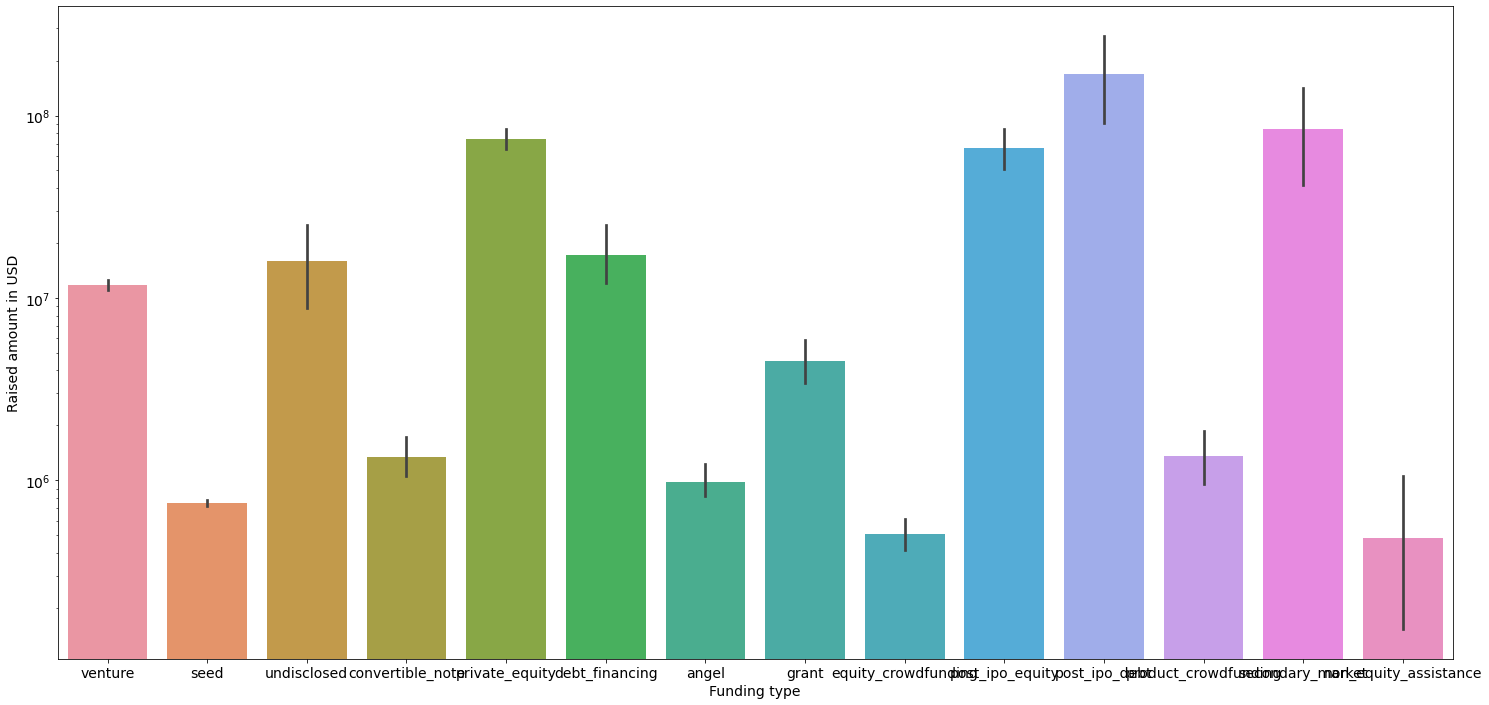

In [24]:
#Showing funding type with investment to identify 5-15M type
plt.rc('font', size=14)
plt.figure(num=None,figsize=(25,12))
sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame)
plt.xlabel('Funding type')
plt.ylabel('Raised amount in USD')
plt.yscale('log')
plt.show()

Selecting records where funding round type is <b>venture</b>

In [30]:
#Filtering venture type records
master_frame = master_frame.loc[master_frame['funding_round_type']=='venture']
master_frame.head()

,permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code
0,/organization/-fame,venture,"10,000,000.00",#fame,Media,operating,IND
4,/organization/0-6-com,venture,"2,000,000.00",0-6.com,Curated Web,operating,CHN
8,/organization/0ndine-biomedical-inc,venture,"719,491.00",Ondine Biomedical Inc.,Biotechnology,operating,CAN
10,/organization/0xdata,venture,"20,000,000.00",H2O.ai,Analytics,operating,USA
11,/organization/0xdata,venture,"1,700,000.00",H2O.ai,Analytics,operating,USA


In [29]:
#Records after filtering in master dataframe
print('Count of records {}'.format(len(master_frame)))

Count of records 47809


In [27]:
master_frame['country_code'].value_counts()

USA    35943
GBR     2041
CHN     1548
CAN     1246
FRA      912
       ...  
MAR        1
MMR        1
KWT        1
LAO        1
MCO        1
Name: country_code, Length: 97, dtype: int64

In [31]:
master_frame['category_list'].value_counts()

Biotechnology                                                       5402
Software                                                            3960
Health Care                                                         1375
Clean Technology                                                    1268
Enterprise Software                                                 1149
                                                                    ... 
Identity|Identity Management|Online Identity                           1
Cloud Computing|Enterprise Software|PaaS|Startups                      1
Curated Web|Developer APIs|Developer Tools|Development Platforms       1
Hardware + Software|Linux|Mobile|Open Source                           1
Cloud Data Services|Television|Video Streaming                         1
Name: category_list, Length: 9946, dtype: int64

Extracting the primary sector from category list. The sector before the | symbol becomes the primary sector. 

- Eg Cloud Computing|Enterprise Software|PaaS|Startups will become 'Cloud Computing'

In [33]:
#extracting the primary sector as first element of every value(separated by |) of a cell 
master_frame['primary_sector']=master_frame['category_list'].apply(lambda v: v.split('|')[0].lower())
master_frame['primary_sector'].head()

0             media
4       curated web
8     biotechnology
10        analytics
11        analytics
Name: primary_sector, dtype: object

Selecting top 9 countries based of the amount raised in venture funding type

In [44]:
top9=master_frame
top9_grouped=top9.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False).astype('int64')
top9_grouped = top9_grouped[:9]

In [46]:
top9_grouped

country_code
USA    420068029342
CHN     39338918773
GBR     20072813004
IND     14261508718
CAN      9482217668
FRA      7226851352
ISR      6854350477
DEU      6306921981
JPN      3167647127
Name: raised_amount_usd, dtype: int64

In [51]:
#Selecting english speaking countries - USA, GBR, IND
eng = ['USA','GBR','IND']
top9_grouped = top9_grouped.loc[top9_grouped.index.isin(eng)]

In [53]:
top9_grouped

country_code
USA    420068029342
GBR     20072813004
IND     14261508718
Name: raised_amount_usd, dtype: int64

In [54]:
top9.head(10)

,permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code,primary_sector
0,/organization/-fame,venture,"10,000,000.00",#fame,Media,operating,IND,media
4,/organization/0-6-com,venture,"2,000,000.00",0-6.com,Curated Web,operating,CHN,curated web
8,/organization/0ndine-biomedical-inc,venture,"719,491.00",Ondine Biomedical Inc.,Biotechnology,operating,CAN,biotechnology
10,/organization/0xdata,venture,"20,000,000.00",H2O.ai,Analytics,operating,USA,analytics
11,/organization/0xdata,venture,"1,700,000.00",H2O.ai,Analytics,operating,USA,analytics
12,/organization/0xdata,venture,"8,900,000.00",H2O.ai,Analytics,operating,USA,analytics
22,/organization/1-mainstream,venture,"5,000,000.00",1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,apps
28,/organization/10-minutes-with,venture,"4,000,000.00",10 Minutes With,Education,operating,GBR,education
34,/organization/1000memories,venture,"2,520,000.00",1000memories,Curated Web,acquired,USA,curated web
38,/organization/1000museums-com,venture,"265,940.00",1000museums.com,Curated Web,operating,USA,curated web


In [55]:
master_frame['category_list'].head(10)

0                                Media
4                          Curated Web
8                        Biotechnology
10                           Analytics
11                           Analytics
12                           Analytics
22    Apps|Cable|Distribution|Software
28                           Education
34                         Curated Web
38                         Curated Web
Name: category_list, dtype: object

Mapping file contains relation between domain and primary sector

In [60]:
#Loading mapping file
mapping = pd.read_csv("data/mapping.csv", encoding = "ISO-8859-1")
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [61]:
len(mapping.index)

688

In [62]:
mapping = mapping[pd.notnull(mapping['category_list'])]

In [63]:
len(mapping.index)

687

In [64]:
#mapping after removing nan entry
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0


In [69]:

mapping = pd.melt(mapping, id_vars =['category_list'], value_vars =['Manufacturing','Automotive & Sports',
                                                              'Cleantech / Semiconductors','Entertainment',
                                                             'Health','News, Search and Messaging','Others',
                                                             'Social, Finance, Analytics, Advertising']) 
mapping = mapping[~(mapping.value == 0)]
mapping = mapping.drop('value', axis = 1)
mapping = mapping.rename(columns = {"variable":"main_sector"})
mapping.head()

,category_list,main_sector
0,3D,Manufacturing
1,3D Printing,Manufacturing
2,3D Technology,Manufacturing
6,Advanced Materials,Manufacturing
14,Agriculture,Manufacturing


In [70]:
primary_sector = mapping['category_list'].str.lower()
len(primary_sector)

687

In [71]:
primary_sector.sort_values(ascending=True)

1844                 0notechnology
1845    0tural language processing
1846              0tural resources
3908                     0vigation
0                               3d
                   ...            
4804                     wholesale
2744              wine and spirits
2745                      wireless
4807                         women
4808                  young adults
Name: category_list, Length: 687, dtype: object

Some records has '0' instead on  'na'.  
- Eg 0notechnology should be nanotechnology

In [72]:
#Looks like file had 0s instead of na ,Replacing na by 0 (tried merge but records difference islarger if this is not replaced)
primary_sector=primary_sector.apply(lambda x: x.replace('0', 'na'))
primary_sector.sort_values(ascending=True)

0                     3d
1            3d printing
2          3d technology
4812          accounting
2752    active lifestyle
              ...       
4804           wholesale
2744    wine and spirits
2745            wireless
4807               women
4808        young adults
Name: category_list, Length: 687, dtype: object

In [73]:
main_sector = mapping.main_sector

In [74]:
master_mapping=pd.DataFrame({'primary_sector':primary_sector.values, 'main_sector':main_sector.values})
master_mapping.head()

,primary_sector,main_sector
0,3d,Manufacturing
1,3d printing,Manufacturing
2,3d technology,Manufacturing
3,advanced materials,Manufacturing
4,agriculture,Manufacturing


Sorting english speaking countries from the top 9 list based on the amount raised

In [78]:
english_speaking = top9[top9['country_code'].isin(['USA', 'GBR', 'IND'])]
english_speaking.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)
english_speaking.head()

,permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code,primary_sector
0,/organization/-fame,venture,"10,000,000.00",#fame,Media,operating,IND,media
10,/organization/0xdata,venture,"20,000,000.00",H2O.ai,Analytics,operating,USA,analytics
11,/organization/0xdata,venture,"1,700,000.00",H2O.ai,Analytics,operating,USA,analytics
12,/organization/0xdata,venture,"8,900,000.00",H2O.ai,Analytics,operating,USA,analytics
22,/organization/1-mainstream,venture,"5,000,000.00",1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,apps


country_code
GBR    20,004,243,770.00
IND    14,261,508,718.00
USA   419,827,724,225.00
Name: raised_amount_usd, dtype: float64


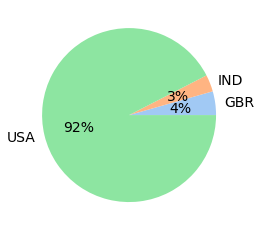

In [96]:
top3 = english_speaking[['raised_amount_usd','country_code']]
top3 = top3.groupby('country_code')['raised_amount_usd'].sum()
top3.columns = ['Amount Raised','Country Code']
colors = sns.color_palette('pastel')[0:3]
print(top3)
plt.pie(top3.values, labels = top3.index, colors = colors, autopct='%.0f%%')
plt.show()

In [79]:
english_speaking = pd.merge(english_speaking, master_mapping, how="inner",on="primary_sector")

english speaking / venture

In [48]:
english_speaking.head(15)

,permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code,primary_sector,main_sector
0,/organization/-fame,venture,"10,000,000.00",#fame,Media,operating,IND,media,Entertainment
1,/organization/90min,venture,"15,000,000.00",90min,Media|News|Publishing|Soccer|Sports,operating,GBR,media,Entertainment
2,/organization/90min,venture,"5,800,000.00",90min,Media|News|Publishing|Soccer|Sports,operating,GBR,media,Entertainment
3,/organization/90min,venture,"18,000,000.00",90min,Media|News|Publishing|Soccer|Sports,operating,GBR,media,Entertainment
4,/organization/all-def-digital,venture,"5,000,000.00",All Def Digital,Media,operating,USA,media,Entertainment
5,/organization/audiosocket,venture,"650,000.00",Audiosocket,Media|Music|Technology,operating,USA,media,Entertainment
6,/organization/audiosocket,venture,"750,000.00",Audiosocket,Media|Music|Technology,operating,USA,media,Entertainment
7,/organization/audiosocket,venture,"1,582,300.00",Audiosocket,Media|Music|Technology,operating,USA,media,Entertainment
8,/organization/babble,venture,"2,000,000.00",Babble,Media|News|Parenting,acquired,USA,media,Entertainment
9,/organization/babble,venture,"1,250,000.00",Babble,Media|News|Parenting,acquired,USA,media,Entertainment


In [49]:
len(english_speaking)

38788

Selecting venture records in english speaking countries if the amount raised is in between 5M and 15M

##### USA

In [101]:
#USA 5M - 15M
USA=english_speaking[(english_speaking['raised_amount_usd']>=5000000.0) & (english_speaking['raised_amount_usd'] <= 15000000.0) & (english_speaking['country_code'] == 'USA')]

#### GBR

In [102]:
#GBR 5M - 15M
GBR=english_speaking[(english_speaking['raised_amount_usd']>=5000000.0) & (english_speaking['raised_amount_usd'] <= 15000000.0) & (english_speaking['country_code'] == 'GBR')]

##### IND

In [103]:
#IND 5M - 15M
IND=english_speaking[(english_speaking['raised_amount_usd']>=5000000.0) & (english_speaking['raised_amount_usd'] <= 15000000.0) & (english_speaking['country_code'] == 'IND')]

In [104]:
print('Count for USA: {}'.format(len(USA.index)))
print('Count for GBR: {}'.format(len(GBR.index)))
print('Count for IND: {}'.format(len(IND.index)))

Count for USA: 12063
Count for GBR: 621
Count for IND: 328


Finding main sectors of USA, GBR & IND

In [105]:
USA_grouped = USA.groupby('main_sector')
GBR_grouped = GBR.groupby('main_sector')
IND_grouped = IND.groupby('main_sector')

main_sector
Others                                     2950
Social, Finance, Analytics, Advertising    2714
Cleantech / Semiconductors                 2350
News, Search and Messaging                 1583
Health                                      909
Name: raised_amount_usd, dtype: int64


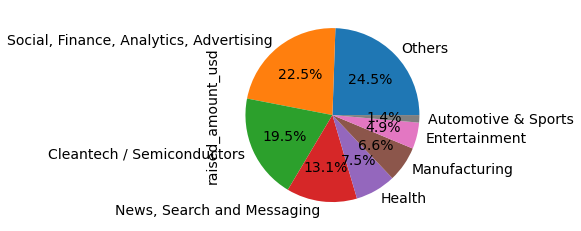

In [134]:
#sectorwise funding count of USA
USA_topSector = USA_grouped['raised_amount_usd'].count().sort_values(ascending=False)
print(USA_topSector.head(5))
USA_topSector.plot.pie(autopct="%.1f%%");

main_sector
Others                                     147
Social, Finance, Analytics, Advertising    133
Cleantech / Semiconductors                 130
News, Search and Messaging                  73
Entertainment                               56
Name: raised_amount_usd, dtype: int64


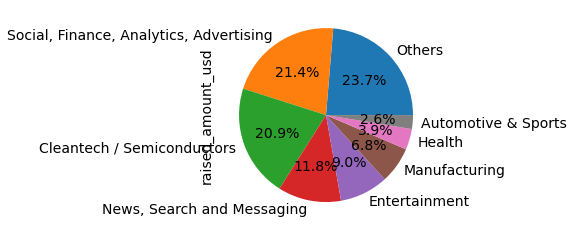

In [135]:
#sectorwise funding count of GBR
GBR_topSector = GBR_grouped['raised_amount_usd'].count().sort_values(ascending=False)
print(GBR_topSector.head(5))
GBR_topSector.plot.pie(autopct="%.1f%%");

main_sector
Others                                     110
Social, Finance, Analytics, Advertising     60
News, Search and Messaging                  52
Entertainment                               33
Manufacturing                               21
Name: raised_amount_usd, dtype: int64


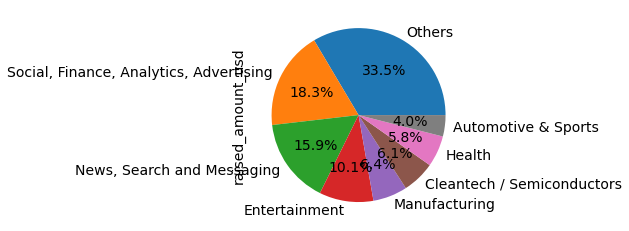

In [136]:
#sectorwise funding count of IND
IND_topSector = IND_grouped['raised_amount_usd'].count().sort_values(ascending=False)
print(IND_topSector.head(5))
IND_topSector.plot.pie(autopct="%.1f%%");

main_sector
Others                                    26,321,007,002.00
Social, Finance, Analytics, Advertising   23,807,376,964.00
Cleantech / Semiconductors                21,633,430,822.00
News, Search and Messaging                13,971,567,428.00
Health                                     8,211,859,357.00
Manufacturing                              7,258,553,378.00
Entertainment                              5,099,197,982.00
Automotive & Sports                        1,454,104,361.00
Name: raised_amount_usd, dtype: float64


<AxesSubplot:ylabel='raised_amount_usd'>

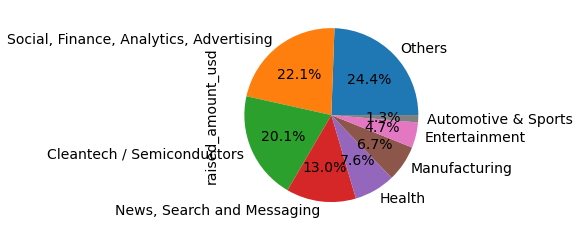

In [139]:
#Sectorwise expenditure USA
USA_sectorwise = USA_grouped['raised_amount_usd'].sum().sort_values(ascending=False)
print(USA_sectorwise)
USA_sectorwise.plot.pie(autopct="%.1f%%")

main_sector
Others                                    1,283,624,289.00
Cleantech / Semiconductors                1,163,990,056.00
Social, Finance, Analytics, Advertising   1,089,404,014.00
News, Search and Messaging                  615,746,235.00
Entertainment                               482,784,687.00
Manufacturing                               361,940,335.00
Health                                      214,537,510.00
Automotive & Sports                         167,051,565.00
Name: raised_amount_usd, dtype: float64


<AxesSubplot:ylabel='raised_amount_usd'>

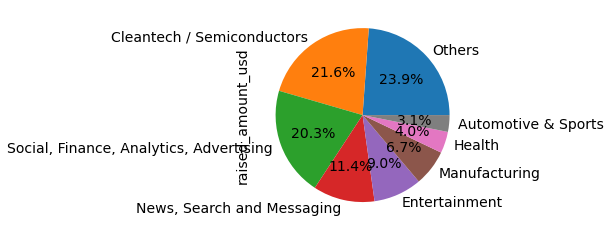

In [140]:
#Sectorwise expenditure GBR
GBR_sectorwise = GBR_grouped['raised_amount_usd'].sum().sort_values(ascending=False)
print(GBR_sectorwise)
GBR_sectorwise.plot.pie(autopct="%.1f%%")

main_sector
Others                                    1,013,409,507.00
Social, Finance, Analytics, Advertising     550,549,550.00
News, Search and Messaging                  433,834,545.00
Entertainment                               280,830,000.00
Manufacturing                               200,900,000.00
Health                                      167,740,000.00
Cleantech / Semiconductors                  165,380,000.00
Automotive & Sports                         136,900,000.00
Name: raised_amount_usd, dtype: float64


<AxesSubplot:ylabel='raised_amount_usd'>

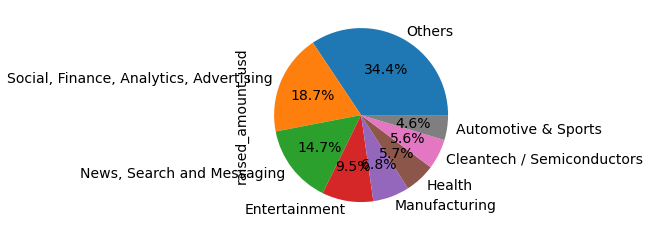

In [141]:
#Sectorwise expenditure IND
IND_sectorwise = IND_grouped['raised_amount_usd'].sum().sort_values(ascending=False)
print(IND_sectorwise)
IND_sectorwise.plot.pie(autopct="%.1f%%")

##### Company with highest funding in highest funded sector (Others) in USA

In [143]:
USA_Others=USA.loc[(USA['main_sector']=='Others')]

In [144]:
USA_Others.groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False)

permalink
/organization/virtustream           64,300,000.00
/organization/capella               54,968,051.00
/organization/airtight-networks     54,201,907.00
/organization/decarta               52,100,000.00
/organization/black-duck-software   51,000,000.00
                                         ...     
/organization/startforce             5,000,000.00
/organization/lumeta                 5,000,000.00
/organization/storenvy               5,000,000.00
/organization/stormwind              5,000,000.00
/organization/reachforce             5,000,000.00
Name: raised_amount_usd, Length: 2049, dtype: float64

permalink
/organization/virtustream           64,300,000.00
/organization/capella               54,968,051.00
/organization/airtight-networks     54,201,907.00
/organization/decarta               52,100,000.00
/organization/black-duck-software   51,000,000.00
Name: raised_amount_usd, dtype: float64


<AxesSubplot:ylabel='raised_amount_usd'>

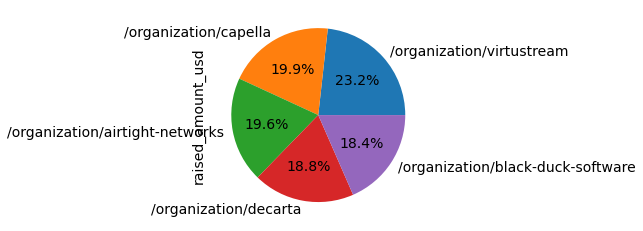

In [153]:
USA_top5 = USA_Others.groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False)[:5]
print(USA_top5)
USA_top5.plot.pie(autopct="%.1f%%")

##### Company with highest funding in highest funded sector (Others) in GBR

permalink
/organization/electric-cloud            37,000,000.00
/organization/sensage                   36,250,000.00
/organization/enigmatic                 32,500,000.00
/organization/silverrail-technologies   29,000,000.00
/organization/opencloud                 27,972,766.00
Name: raised_amount_usd, dtype: float64


<AxesSubplot:ylabel='raised_amount_usd'>

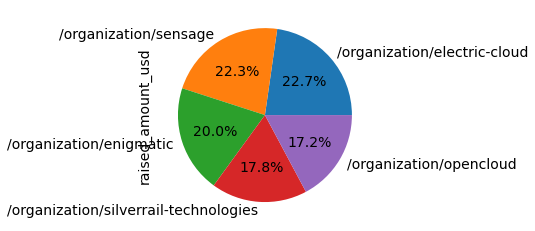

In [160]:
GBR_Others=GBR.loc[(GBR['main_sector']=='Others')]
GBR_top5 = GBR_Others.groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False)
GBR_top5 = GBR_top5[:5]
print(GBR_top5)
GBR_top5.plot.pie(autopct="%.1f%%")

##### Company with highest funding in highest funded sector (Others) in IND

permalink
/organization/electric-cloud            37,000,000.00
/organization/sensage                   36,250,000.00
/organization/enigmatic                 32,500,000.00
/organization/silverrail-technologies   29,000,000.00
/organization/opencloud                 27,972,766.00
Name: raised_amount_usd, dtype: float64


<AxesSubplot:ylabel='raised_amount_usd'>

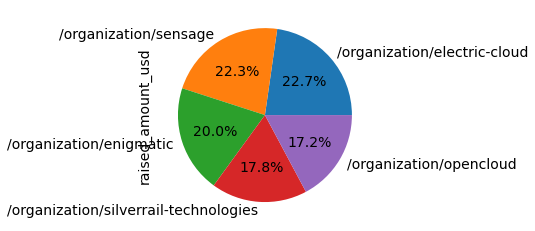

In [155]:
##### Company with highest funding in highest funded sector (Others) in USA
IND_Others=IND.loc[(IND['main_sector']=='Others')]
IND_top5 = IND_Others.groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False)
IND_top5 = GBR_top5[:5]
print(IND_top5)
IND_top5.plot.pie(autopct="%.1f%%")

##### Company with highest funding in highest funded sector (Social, Finance, Analytics, Advertising) in USA

permalink
/organization/shotspotter   67,933,006.00
/organization/demandbase    63,000,000.00
/organization/intacct       61,800,000.00
/organization/netbase       60,600,000.00
/organization/lotame        59,700,000.00
Name: raised_amount_usd, dtype: float64


<AxesSubplot:ylabel='raised_amount_usd'>

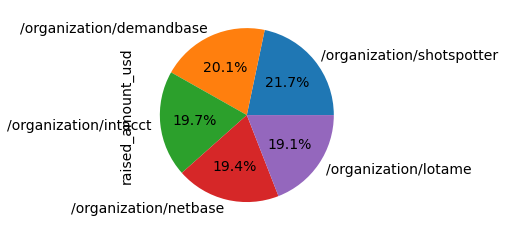

In [156]:
USA_Social=USA.loc[(USA['main_sector']=='Social, Finance, Analytics, Advertising')]
USA_social_top5 = USA_Social.groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False)[0:5]
print(USA_social_top5)
USA_social_top5.plot.pie(autopct="%.1f%%")

##### Company with highest funding in highest funded sector (Social, Finance, Analytics, Advertising) in GBR

permalink
/organization/celltick-technologies   37,500,000.00
/organization/mythings                34,000,000.00
/organization/zopa                    32,900,000.00
/organization/imagini                 28,550,000.00
/organization/marketinvoice           25,553,007.00
Name: raised_amount_usd, dtype: float64


<AxesSubplot:ylabel='raised_amount_usd'>

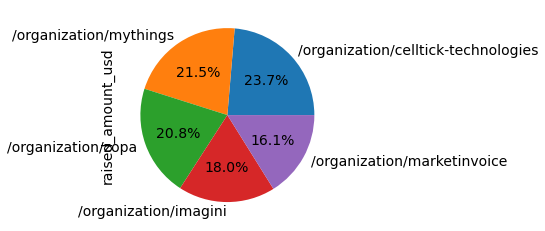

In [157]:
GBR_Social=GBR.loc[(GBR['main_sector']=='Social, Finance, Analytics, Advertising')]
GBR_social_top5 = GBR_Social.groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False)[0:5]
print(GBR_social_top5)
GBR_social_top5.plot.pie(autopct="%.1f%%")

##### Company with highest funding in highest funded sector (Social, Finance, Analytics, Advertising) in IND

permalink
/organization/manthan-systems              50,700,000.00
/organization/komli-media                  28,000,000.00
/organization/shopclues-com                25,000,000.00
/organization/intarvo                      21,900,000.00
/organization/grameen-financial-services   21,556,050.00
Name: raised_amount_usd, dtype: float64


<AxesSubplot:ylabel='raised_amount_usd'>

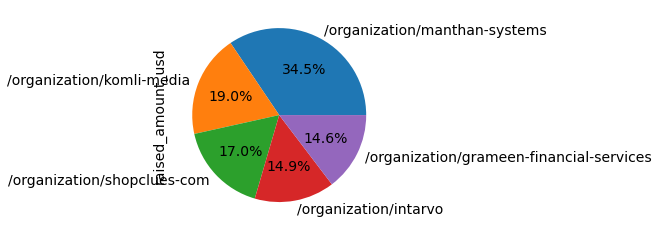

In [159]:
IND_Social=IND.loc[(IND['main_sector']=='Social, Finance, Analytics, Advertising')]
IND_social_top5 = IND_Social.groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False)[0:5]
print(IND_social_top5)
IND_social_top5.plot.pie(autopct="%.1f%%")

###### Conclusion
Based on the constraints mentioned (5m - 15m investment & english speaking nations)we conclude the following:

1. USA, GBR and IND are top 3 english speaking countries (countries with english as one of their primary languages)
2. USA
    - Most common sector - Others
    - 2nd Most common secotr - 